In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing
from sklearn.decomposition import PCA

In [2]:
NBA = pd.read_csv('NBA.csv')
NBA

,Season,Row ID,Team,Wins,1 TS,1% TS,1% SC,2 TS,2% TS,2% SC,...,7% SC,8 TS,8% TS,8% SC,9 TS,9% TS,9% SC,10 TS,10% TS,10% SC
0,2016-17,0,Utah Jazz,0.621951,16073140.0,19.942308,17.073112,27123140.0,33.652293,28.810575,...,71.399844,69651289.0,86.417929,73.984565,71991889.0,89.321964,76.470783,74241889.0,92.113590,78.860764
1,2016-17,1,Denver Nuggets,0.487805,15050000.0,18.226077,15.986319,27128652.0,32.853747,28.816430,...,63.172711,62972685.0,76.262125,66.890459,66214485.0,80.188058,70.333944,69425325.0,84.076498,73.744543
2,2016-17,2,Portland Trailblazers,0.500000,24328425.0,21.746512,25.841990,42828425.0,38.283155,45.492947,...,98.260180,99171748.0,88.646906,105.341606,102391327.0,91.524800,108.761487,105142687.0,93.984165,111.684020
3,2016-17,3,Minnesota Timberwolves,0.378049,13550000.0,16.601043,14.392998,25650000.0,31.425590,27.245786,...,60.729018,61044639.0,74.790012,64.842462,64844639.0,79.445655,68.878875,68344639.0,83.733747,72.596623
4,2016-17,4,Oklahoma City Thunder,0.573171,26540100.0,29.056399,28.191262,43685938.0,47.827855,46.403809,...,78.360751,76911679.0,84.203768,81.696652,79469224.0,87.003797,84.413312,81952264.0,89.722257,87.050831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2020-21,25,Philadelphia 76ers,0.680556,33517241.0,23.160351,35.602478,63059251.0,43.573824,66.982411,...,138.178101,132796290.0,91.761987,141.058061,135361043.0,93.534227,143.782377,137839883.0,95.247101,146.415435
146,2020-21,26,Brooklyn Nets,0.666667,41254920.0,24.808721,37.800000,81363870.0,48.928310,74.550000,...,142.285256,157380168.0,94.640848,144.200264,159204171.0,95.737715,145.871515,160868032.0,96.738281,147.396034
147,2020-21,27,New York Knicks,0.430556,18900000.0,20.263557,17.317207,27131760.0,29.089205,24.859593,...,53.530265,63284971.0,67.850721,57.985130,64284971.0,68.922867,58.901384,68873651.0,73.842601,63.105782
148,2020-21,28,Toronto Raptors,0.375000,30559200.0,23.905854,28.000000,61059200.0,47.765397,55.945758,...,100.656634,113728865.0,88.967828,104.204568,117533015.0,91.943739,107.690137,119791015.0,93.710128,109.759039


In [3]:
NBA_y = NBA['Wins']

In [4]:
NBA_X = NBA.drop(columns=['Team', 'Wins','Season','Row ID'])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(NBA_X, NBA_y, test_size=0.2, random_state=15)

In [6]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
#first model selection is ridge. Ridge should work better than linearReg and Lasso due 
#to the colinearity of features

#standardized
ridge_std = linear_model.RidgeCV()
model_ridge_std = ridge_std.fit(X_train_scaled, y_train)
ridge_coef = ridge_std.fit(X_train_scaled, y_train).coef_

#NOT standardized
ridge = linear_model.RidgeCV()
model_ridge = ridge.fit(X_train, y_train)
print('std : ', model_ridge_std.alpha_, 'not std : ',model_ridge.alpha_)

std :  0.1 not std :  1.0


In [8]:
#comparing models
model_ridge_std.score(X_train_scaled, y_train), model_ridge.score(X_train, y_train)

(0.4097123884156916, -425.2361777621615)

In [9]:
#the standardized model was WOW-ZERS BETTER, still not great

In [10]:
#continuing with just standardized

y_predRIDGE = model_ridge_std.predict(X_test_scaled)
win_predict_ridge = y_predRIDGE-y_test

In [11]:
win_predict_ridge.describe()

count    30.000000
mean      0.007382
std       0.116787
min      -0.235654
25%      -0.071142
50%       0.003344
75%       0.068527
max       0.250479
Name: Wins, dtype: float64

In [12]:
# trying a different type of scaling

min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(X_train)
X_train_mms = min_max_scaler.transform(X_train)
X_test_mms = min_max_scaler.transform(X_test)

In [13]:
#min max std
mms_ridge = linear_model.RidgeCV()
mms_ridge_model = mms_ridge.fit(X_train_mms, y_train)

#NOT standardized is the same so do nothing new

print('min max std : ', mms_ridge_model.alpha_)

min max std :  0.1


In [14]:
#comparing models
model_ridge_std.score(X_train_scaled, y_train), mms_ridge_model.score(X_train_mms, y_train)

(0.4097123884156916, 0.3368239173740357)

In [15]:
#lets try power transformer
power = preprocessing.PowerTransformer(method='box-cox')
power.fit(X_train)
X_train_power = power.transform(X_train)
X_test_power = power.transform(X_test)

In [16]:
#power
ridge_power = linear_model.RidgeCV()
model_ridge_power = ridge_power.fit(X_train_power, y_train)

In [17]:
#comparing standardizer
model_ridge_power.score(X_train_power, y_train)

0.31118085572014853

In [18]:
#the standardscaler did better than the min max scaler and the power transformer

In [19]:
#let's test lasso
names = NBA.drop(['Team', 'Wins','Season','Row ID'], axis=1).columns
lasso = linear_model.LassoCV(max_iter=200000)
model_lasso = lasso.fit(X_train_scaled, y_train)
lasso_coef = lasso.fit(X_train_scaled, y_train).coef_
model_lasso.score(X_train_scaled, y_train)

0.25389945197408603

In [20]:
#like expected lasso was worse

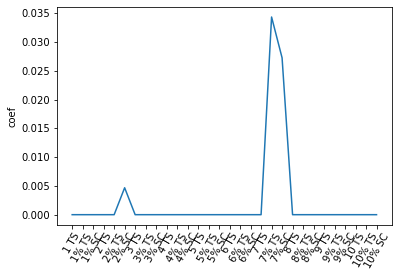

In [21]:
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('coef')
plt.show()

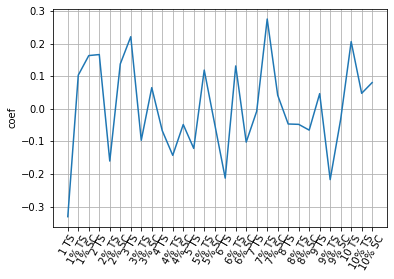

In [22]:
_ = plt.plot(range(len(names)), ridge_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('coef')
_ = plt.grid()
plt.show()

In [23]:
lr = linear_model.LinearRegression()

In [24]:
lr.fit(X_train_scaled, y_train)
lr.score(X_train_scaled, y_train)

0.5201432823399936

In [25]:
y_pred = lr.predict(X_test_scaled)
linear_test = y_pred-y_test
linear_test.describe()

count    30.000000
mean     -0.005059
std       0.122530
min      -0.218431
25%      -0.091051
50%      -0.035537
75%       0.072800
max       0.245342
Name: Wins, dtype: float64

In [26]:
lr.coef_

array([ -1.78604511,   0.07090616,   1.54607753,   0.26945415,
        -0.59423035,   0.5707529 ,   6.32305045,   0.72745486,
        -6.70854341,  -7.91303273,  -1.20387607,   8.9553451 ,
         6.66340402,   0.88178073,  -7.76715918, -10.13975175,
         0.6670328 ,   7.95607058,  10.09639181,  -0.56644508,
        -7.08262499,  -5.4241858 ,   1.05024492,   1.30892382,
        -2.37405527,  -2.142063  ,   8.3245718 ,   4.06596755,
         1.03262594,  -6.78012384])

In [27]:
lr.get_params

<bound method BaseEstimator.get_params of LinearRegression()>

In [28]:
mean_squared_error(y_test, y_pred)

0.014538732733912032

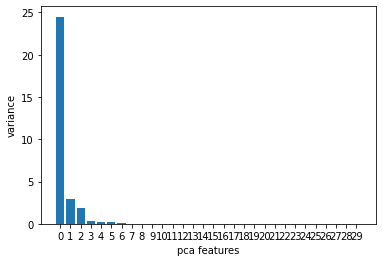

In [83]:
pca = PCA()
pca.fit(X_train_scaled)
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('pca features')
plt.show()

In [84]:
#this agrees with lasso that only 3 features are meaningful; 
#get 2 great players and then also spend most of your money on the top 7